# Unit #4 Intro to Bayesian computation

The goal of this assignment is to implement various posterior estimation and summary algorithms.

## Problem #1 

The Hubble data frame contains $3$ columns and $24$ rows. The columns are:

- `Galaxy`: A (factor) label identifying the galaxy.

- `y`: The galaxy's relative velocity in kilometres per second.

- `x`: The galaxy's distance in Mega parsecs. 1 parsec is 3.09e13 km.

For this problem, let's just single out `x`. Suppose that `x` is a vector of realizations from $X_1,...,X_{24} \overset{iid}{\sim} N(\mu, \sigma^2)$. In class, we showed that, if $\pi(\mu,\sigma^2) = 1/\sigma^2$, then the joint posterior distribution for $(\mu, \sigma^2)$ is normal-inverse-$\chi^2$. Our goal in this problem will be to find the MAP.

In [1]:
library(LaplacesDemon)
hubble = read.table(url("https://raw.githubusercontent.com/bzaharatos/STAT-5630/main/hubble.txt"), sep = "\t")

n = length(hubble$x); 
x = hubble$x

#frequentist point estimates
sqrt(var(hubble$x)*(n-1)/n)
mean(hubble$x)

[1] 5.692221

[1] 12.05458

**Write a function that takes in a vector `theta` and gives as output the gradient vector of the log-posterior.**

In [2]:
g = function(theta,x){
    xbar = mean(x); s2 = var(x)
    mu = theta[1]; sig = theta[2]
    g1 = n*(xbar-mu)/sig^2
    g2 = (-n-2)/sig + ((n-1)*s2 + n*(xbar - mu)^2)/sig^3
    return(c(g1,g2))
}

**Write the gradient ascent algorithm with $\boldsymbol\theta = (0,1)$, $m = 10,000$ and $\gamma = 0.01$. How do the results compare with the point estimates above?**

In [3]:
#find MAP
ga = 0.01

#gradient


m = 10000

theta = c(0,1) 

for (i in 2:m){
    theta = theta + ga*g(theta,hubble$x)
}
theta

[1] 12.054583  5.468909

**Use the built-in `R` function `optim()` to maximize the log-likelihood function. Compare the results here with those above.**

To do so, write a function `ll(theta,x)` that takes in the two-dimensional vector of parameters `theta` and the data, `x`,and that returns the **negative** log-likelihood. Then run `optim(c(0,1),ll,x = hubble$x)`.

In [4]:
library(LearnBayes) #install this package if you don't have it.


x = hubble$x
ll = function(theta,x){
    n = length(x); xbar = mean(x); s2 = var(x)
    mu = theta[1]; sig = theta[2]
    ll = -(n+2)*log(sig) - 1/(2*sig^2)*((n-1)*s2 + n*(xbar-mu)^2)
    return(-ll)
}


optim(c(0,1), ll, x = hubble$x)

#laplace(ll,c(0,1), x = hubble$x) #convert function to log likelihood


Attaching package: ‘LearnBayes’

The following object is masked from ‘package:LaplacesDemon’:

    rdirichlet



$par
[1] 12.052510  5.467998

$value
[1] 57.17606

$counts
function gradient 
      83       NA 

$convergence
[1] 0

$message
NULL

## Problem #2 Bayesian Regression modeling in R continued

The following dataset containts measurements related to the impact of three advertising medias on sales of a product, $P$. The variables are:

- `youtube`($\mathbf{x}_1$): the advertising budget allocated to YouTube. Measured in thousands of dollars;

- `facebook` ($\mathbf{x}_2$): the advertising budget allocated to Facebook. Measured in thousands of dollars; and 

- `newspaper`($\mathbf{x}_3$): the advertising budget allocated to a local newspaper. Measured in thousands of dollars.

- `sales`($\mathbf{Y}$): the value in the $i^{th}$ row of the sales column is a measurement of the sales (in thousands of units) for product $P$ for company $i$.

The advertising data treat "a company selling product $P$" as the statistical unit, and "all companies selling product $P$" as the population. We assume that the $n = 200$ companies in the dataset were chosen at random from the population (a strong assumption!).

In [5]:
library(ggplot2)

marketing = read.table(url("https://raw.githubusercontent.com/bzaharatos/-Statistical-Modeling-for-Data-Science-Applications/master/Modern%20Regression%20Analysis%20/Datasets/marketing.txt"), sep = "")

head(marketing)
n = dim(marketing)[1]; p = dim(marketing)[2] - 1; 

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


youtube,facebook,newspaper,sales
276.12,45.36,83.04,26.52
53.40,47.16,54.12,12.48
20.64,55.08,83.16,11.16
181.80,49.56,70.20,22.20
216.96,12.96,70.08,15.48
10.44,58.68,90.00,8.64


**3 (a) Center and scale the data so that the sample mean of each variable is zero and the sample variance is one.**

In [6]:
#scaling the data 
databar = colMeans(marketing)
XX = scale(marketing); 
df = data.frame(XX); 
X = cbind(as.matrix(XX[,1])); p = dim(X)[2]; n = dim(X)[1];dim(X); 
y = df$sales; 

[1] 200   1

**3 (b) Assume that $\mathbf{Y}\, | \, X, \boldsymbol\beta \sim N\left(X\boldsymbol\beta, \Sigma_n\right)$, where $\Sigma_n \propto I_n$. Compute the MLE of  $\boldsymbol\beta$, the residual sum of squares, and $\widehat{\sigma}^2 = \frac{RSS}{n-p}$.**

In [7]:
set.seed(111)

#MLE for SLR

b_ml = solve(t(X)%*%X)%*%t(X)%*%y; 
rss = sum((y - X%*%b_ml)^2)
sig2hat = rss/(n-(p+1)); sqrt(sig2hat)

lmod = lm(sales ~ youtube, data = df)
summary(lmod)

#lmod_full = lm(sales ~ ., data = df)

[1] 0.624568


Call:
lm(formula = sales ~ youtube, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.60729 -0.37461 -0.03666  0.39619  1.38235 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.940e-16  4.416e-02    0.00        1    
youtube      7.822e-01  4.427e-02   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6246 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


**3 (c) Set `Sigma_n =` $\widehat{\sigma}^2I_n = \Sigma_n$.**

In [8]:
Sigma_n = sig2hat*diag(1,ncol = n, nrow = n);

**3 (d) Assume that $\mathbf{Y}\, | \, X, \boldsymbol\beta \sim N\left(X\boldsymbol\beta, \Sigma_n\right)$, where $\Sigma_n \propto I_n$, and $\beta_j \sim \Gamma(1,2)$. Compute the MAP for $\boldsymbol\beta \, | \, \mathbf{Y}$.** 

In [9]:
y = df$sales; x = cbind(1,df$youtube); beta = c(1,1); 

#MAP
g_beta = function(beta,x,y,a,b){
    g1 = sum(y - beta[1] - beta[2]*x) + (a-1)/beta[1] - b
    g2 = sum((y - beta[1] - beta[2]*x)*x) + (a-1)/beta[2] - b
    return(cbind(g1,g2))
}


m = 10000
ga = 0.001
beta = c(1,1) 
a = 1; b = 2
for (i in 2:m){
    beta = beta + ga*g_beta(beta,df$youtube,df$sales,a,b)
}
beta
coef(lmod)

g1,g2
-0.01,0.7721742


(Intercept)       youtube 
-2.940257e-16  7.822244e-01

## Problem #3 The beta-binomial model


Tsutakawa et al. (1985) describe the problem of simultaneously estimating the rates of death from stomach cancer for males at risk in the age bracket 45–64 for the largest cities in Missouri. 

`y`: number of cancer deaths

`n`: number at risk

We will develop a Bayesian model for these data and estimate the posterior using simulation methods.

In [10]:
library(LearnBayes) #install this package if you don't have it.
data(cancermortality)
head(cancermortality)

var(cancermortality$y); 
mle = sum(cancermortality$y)/sum(cancermortality$n); mle

#mle*(1-mle)/sum(cancermortality$n)

y,n
0,1083
0,855
2,3461
0,657
1,1208
1,1025


[1] 141.9447

[1] 0.0009933126

An original attempt at modeling these data used the binomial distribution: $Y_j \sim Binomial(n_j,p)$. But instead, a reasonable choice for a data model is:

\begin{align*}
f(y_j \, | \, \eta, K) = {n_j \choose y_j} \frac{B\left(K\eta + y_j, K(1-\eta) + n_j -y_j\right)}{B\left(K\eta, K(1-\eta) \right)},
\end{align*}

where $\eta$ is the mean and $K$ the precision of the beta-binomial model. Assume a vague prior:

\begin{align*}
\pi(\eta, K) \propto \frac{1}{\eta(1-\eta)}\frac{1}{(1+K)^2}.
\end{align*}

Then the posterior is:

\begin{align*}
\pi(\eta, K \, | \,y_j, n_j ) \propto f(y_j \, | \, \eta, K)\pi(\eta, K) = \frac{1}{\eta(1-\eta)}\frac{1}{(1+K)^2}\prod_{j=1}^{20}\frac{B\left(K\eta + y_j, K(1-\eta) + n_j -y_j\right)}{B\left(K\eta, K(1-\eta) \right)}
\end{align*}

We typically work with the $\log$, since this is more computationally efficient:


\begin{align*}
\log\left(\pi(\eta, K \, | \,y_j, n_j )\right) \propto  \sum_{j=1}^{20}\bigg(\log\left(B\left(K\eta + y_j, K(1-\eta) + n_j -y_j\right) \right) - \log\left(B\left(K\eta, K(1-\eta) \right)\right) \bigg)  - \log(\eta) - \log(1-\eta) - 2\log(1+K)
\end{align*}

**Write a function that takes in $\boldsymbol\theta = (\eta,K)^T$ and the data $(y_j,n_j)$ and outputs the log of the posterior (up to a normalization constant). Plot the log-posterior using the function `mycontour()`. This function takes in the log-posterior, limits for the graph, and arguments for specifying the data.**

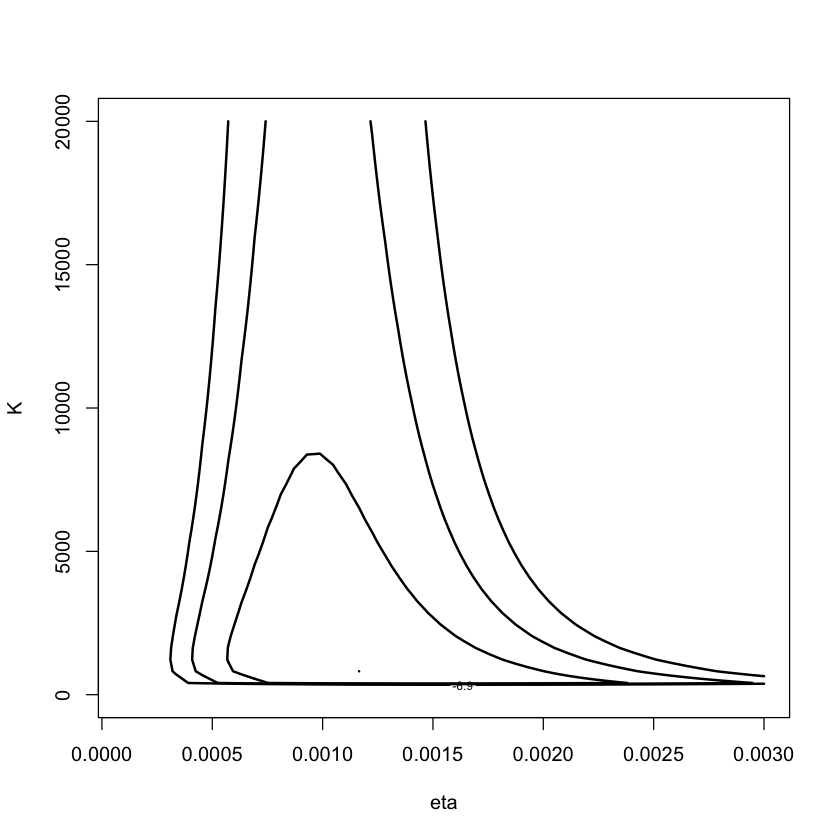

In [11]:
betabinexch0=function (theta, data)
   {
eta = theta[1]
K = theta[2]
y = data[, 1]
n = data[, 2]
N = length(y)
logf = function(y, n, K, eta) lbeta(K * eta + y, K * (1 -
eta) + n - y) - lbeta(K * eta, K * (1 - eta)) 
val = sum(logf(y, n, K, eta))
val = val - 2*log(1 + K) - log(eta) - log(1 - eta) 
    return(val)
}

mycontour(betabinexch0,c(.0001,.003,1,20000),
          cancermortality,xlab="eta",ylab="K")

It is often helpful to transform parameters to the entire real line. 

**Write a function that takes in $\boldsymbol\theta = \left(\log\left(\frac{\eta}{1-\eta}\right), \,  \log K \right)^T$ and the data $(y_j,n_j)$ and outputs the log of the posterior (up to a normalization constant).**

Note that this is a transformation of RVs, so we need to multiply $\pi(\eta, K \, | \,y_j, n_j )$ from above by the Jacobian of the inverse transformation of $\boldsymbol\theta = \left(\log\left(\frac{\eta}{1-\eta}\right), \,  \log K \right)^T$.

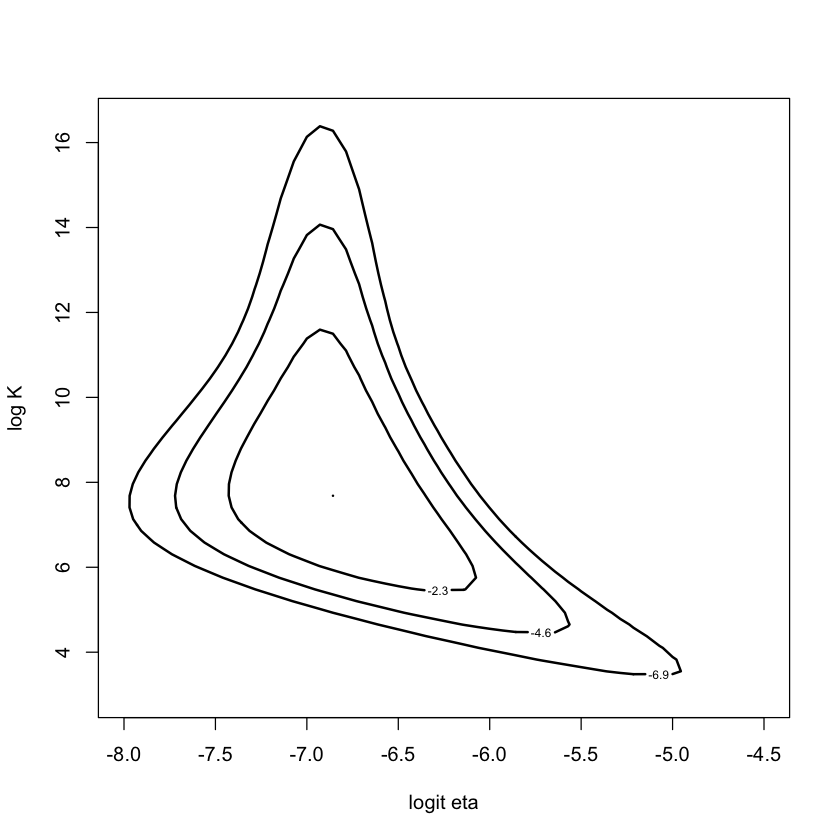

In [12]:
betabinexch=function (theta, data)
   {
       eta = exp(theta[1])/(1 + exp(theta[1]))
       K = exp(theta[2])
       y = data[, 1]
       n = data[, 2]
N = length(y)
logf = function(y, n, K, eta) lbeta(K * eta + y, K * (1 -
eta) + n - y) - lbeta(K * eta, K * (1 - eta))
    val = sum(logf(y, n, K, eta))
       val = val + theta[2] - 2 * log(1 + exp(theta[2]))
       return(val)
}

mycontour(betabinexch,c(-8,-4.5,3,16.5),
          cancermortality,xlab="logit eta",ylab="log K")

Before estimating the entire posterior distribution, let's first find the MAP. This will be helpful in our rejection sampling algorithm. The `laplace()` function in the `LearnBayes` package provides a way to find the MAP. 

**Use the `laplace()` function to estimate the MAP. Also, save the maximum value of the log-posterior.**

The function takes three arguments: 

- The function to be maximized (i.e., the posterior).

- An initial value of the parameters.

- The dataframe.

**Store the output in `fit`.**

In [13]:
fit=laplace(betabinexch,c(-7,6),cancermortality) #MAP
fit
#optim(c(-7,6), betabinexch, data = cancermortality) #could use this, but would want negative posterior

0.07896568,-0.1485087
-0.14850874,1.3483208


Recall that rejection sampling requires a proposal distribution, $p(\boldsymbol\theta)$ to simulate draws from. We then:

- Independently simulate $\boldsymbol\theta_i \sim p(\boldsymbol\theta)$ and $U \sim U(0,1)$ and accept the draw $\boldsymbol\theta_i$ if $U \le \frac{g(\theta \, | \, y_j,n_j)}{c \,p(\theta)}$, where $g(\theta \, | \, \mathbf{x})$ is proportional to the posterior. 

- Otherwise, we reject the draw. We can (and should!) recast this in terms of the log-posterior. 

One choice for $p(\boldsymbol\theta)$ would be a bivariate normal density with mean and variance given as the MAP above. This density is similar to the posterior density, the normal density decays quickly, and so the ratio $g(\boldsymbol\theta\, | \, y)/p(\boldsymbol\theta)$ likely would not be bounded.

So, we'll use a [multivariate $t$ distribution](https://en.wikipedia.org/wiki/Multivariate_t-distribution) as the proposal distribution. This distribution has heavier tails. We use a multivariate $t$ distribution with mean and scale matrix chosen to match the posterior density and a small number of degrees of freedom (`df = 4` below).

**Write a function that takes in $\boldsymbol\theta$ and computes values of $\log(g(\theta \, | \, y_j,n_j) ) - \log(p(\theta))$.**

In [14]:
betabinT=function(theta,datapar) #computes values of log(g(theta | y,n)) - log(p(theta))
   {
   data=datapar$data
   tpar=datapar$par
   d=betabinexch(theta,data)-dmt(theta,mean=c(tpar$m),
     S=tpar$var,df=tpar$df,log=TRUE)
   return(d)
   }

tpar=list(m=fit$mode,var=2*fit$var,df=4); #t distribution parameters
datapar=list(data=cancermortality,par=tpar) #data parameters

**Now, use the `laplace()` function to find the constant $d$ such that $\log(g(\boldsymbol\theta | y_j,n_j)) - \log(p(\boldsymbol\theta)) \le d$.  $d$ is the log-scale value of $c$ discussed in lecture.**

In [15]:
start=c(-6.9,12.4)
fit1=laplace(betabinT,start,datapar) #find the constant d such that 
#log(g(theta | y,n)) - log(p(theta)) <= d
#fit1$mode values that maximize log(g(theta | y,n)) - log(p(theta))
betabinT(fit1$mode,datapar)
dmax = betabinT(fit1$mode,datapar) #dmax = max of log(g(theta | y,n)) 
#- log(p(theta))

[1] -569.2829

**Now, let's use the information from above, and the `rejectsampling()` function to perform rejection sampling!**

The function takes:

- the log of the posterior (using the rescaled parameters).

- the parameters of the proposal distribution (the multivariate $t$ distribution).

- `dmax`.

- the data frame.

In [16]:
#rejection sampling
n = 10

theta=rejectsampling(betabinexch,tpar,-569.2813,10000,cancermortality)
colMeans(theta)
#head(theta)

[1] -6.826742  7.928661

**Produce a contour plot (using `mycontour()`) of the log posterior distribution. Overlay the values of $\boldsymbol\theta$ generated from the rejection sampling algorithm in the previous part.**

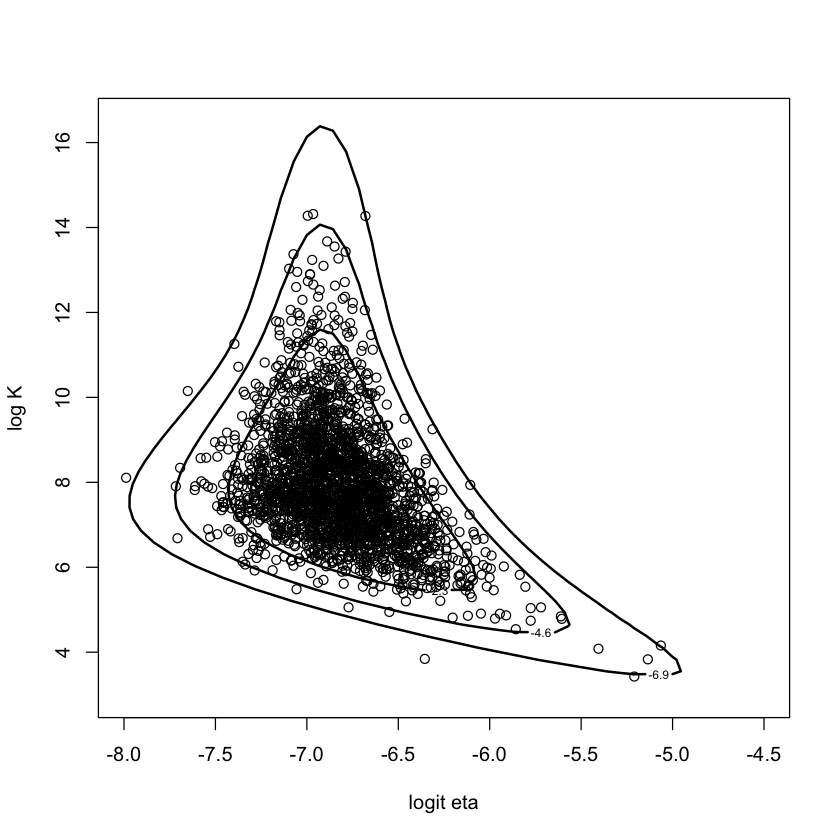

In [17]:
mycontour(betabinexch,c(-8,-4.5,3,16.5),cancermortality,xlab="logit eta",ylab="log K")
points(theta[,1],theta[,2])

## Problem #4 Gibbs Sampling

In this exercise we will use Gibbs sampling to test whether two populations have the same mean. Let the data from the first population be $X_1,...,X_n \overset{iid}{\sim}N(\mu_X, \sigma^2)$ and the second population be $Y_1,...,Y_n \overset{iid}{\sim}N(\mu_Y, \sigma^2)$. The priors are $\mu_X, \mu_Y \sim N(\mu_0, \sigma^2_0)$ and $\sigma^2 \sim InvGamma(a,b)$.

Our goal is to compute the posterior of $\Delta = \mu_X - \mu_Y$ and determine if $\Delta = 0$ (the populations have the same mean) or not. To do this, we compute $\Delta$ at each iteration of the Gibbs sampling algorithm, and then compute the posterior $95\%$ credible interval. To test out the code we will simulate data so we know the true values.

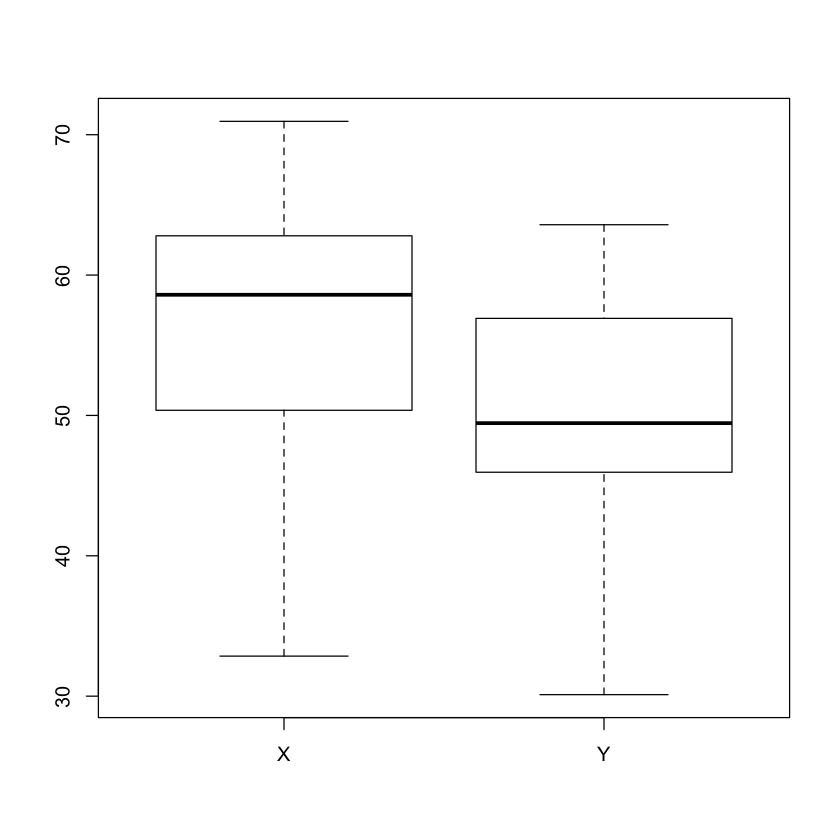

In [18]:
#simulated data
set.seed(1)

n = 20; m = 20; 
muX_true = 55; muY_true = 50; sig2_true = 100

X = rnorm(n,muX_true,sqrt(sig2_true))
Y = rnorm(n,muY_true,sqrt(sig2_true))

boxplot(cbind(X,Y))

In [19]:
t.test(X,Y)


	Welch Two Sample t-test

data:  X and Y
t = 2.4694, df = 37.917, p-value = 0.01815
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  1.255673 12.684235
sample estimates:
mean of x mean of y 
 56.90524  49.93528 


In [20]:
#prior information
mu0 = 0; s20 = 1000
a = 0.01; b = 0.01

In [21]:
n.iters = 30000
theta = matrix(0,n.iters,4) #initialize the matrix of chains
colnames(theta) = c("muX","muY","sigma2","Delta")

  # Initial values
muX = mean(X)
muY = mean(Y)
s2 = (var(X)+var(Y))/2;
theta[1,] = c(muX,muY,s2,muX-muY)

#The Gibbs algorithm
  for(iter in 2:n.iters){
        # sample muX|muY,s2,X,Y
        A = sum(X)/s2+mu0/s20
        B = n/s2+1/s20
        muX = rnorm(1,A/B,1/sqrt(B))

        # sample muY|muX,s2,X,Y
        A = sum(Y)/s2+mu0/s20
        B = m/s2+1/s20
        muY = rnorm(1,A/B,1/sqrt(B))

        # sample s2|muX,muY,X,Y
        A  = n/2+m/2+a
        B  = sum((X-muX)^2)/2 + sum((Y-muY)^2)/2+b
        s2 = 1/rgamma(1,A,B)

    # keep track of the results
     theta[iter,] = c(muX,muY,s2,muX-muY)

  }

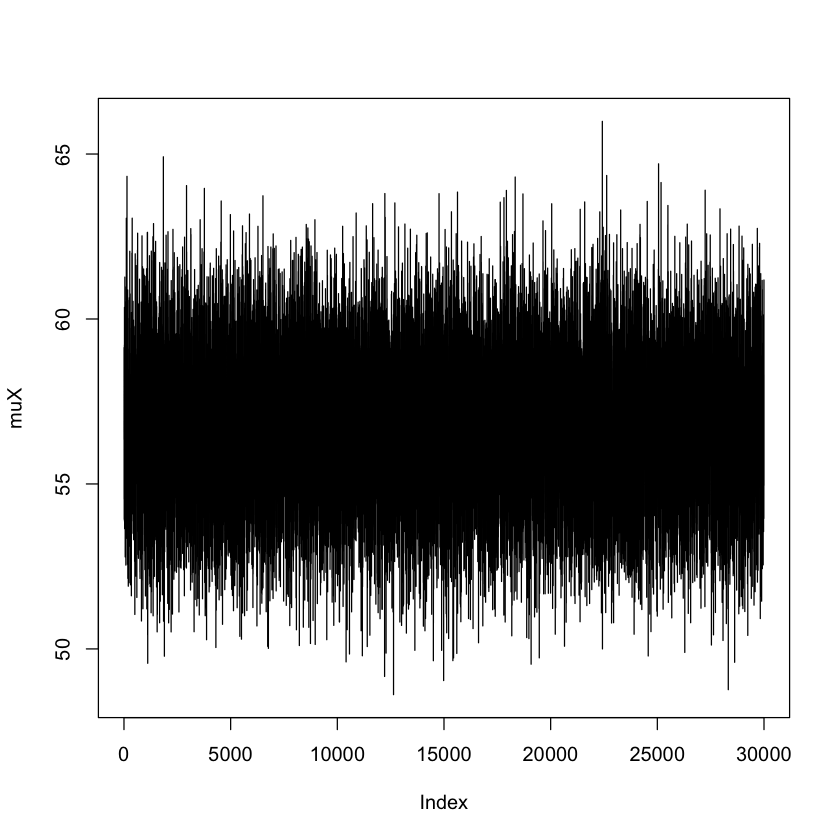

In [22]:
plot(theta[,1],type="l",ylab="muX")
 #abline(muX_true,0,col=2,lwd=2)

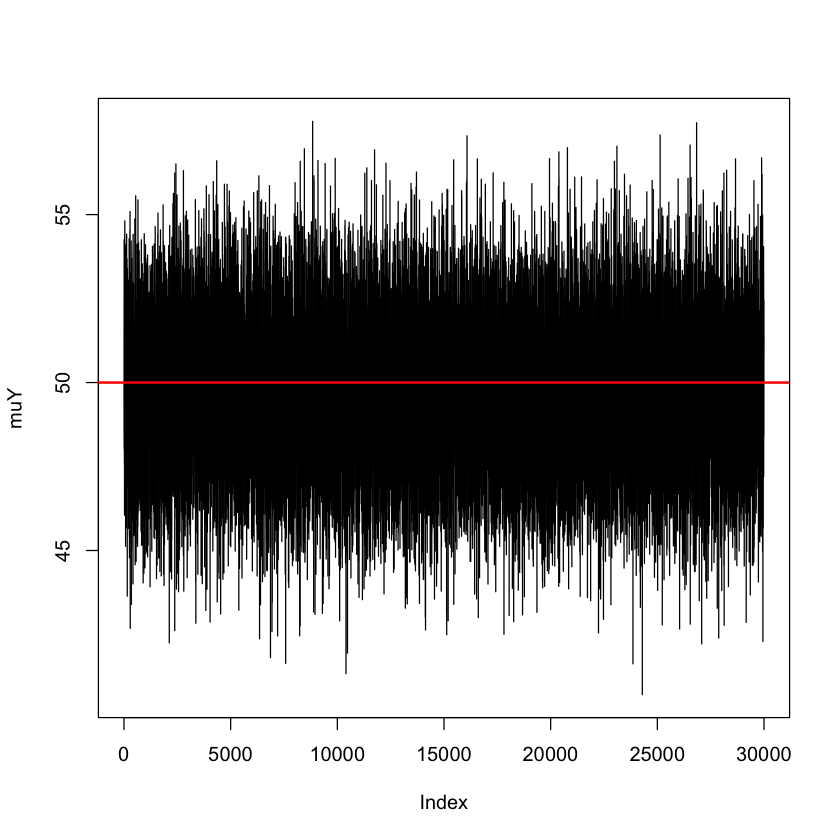

In [23]:
plot(theta[,2],type="l",ylab="muY")
 abline(muY_true,0,col=2,lwd=2)

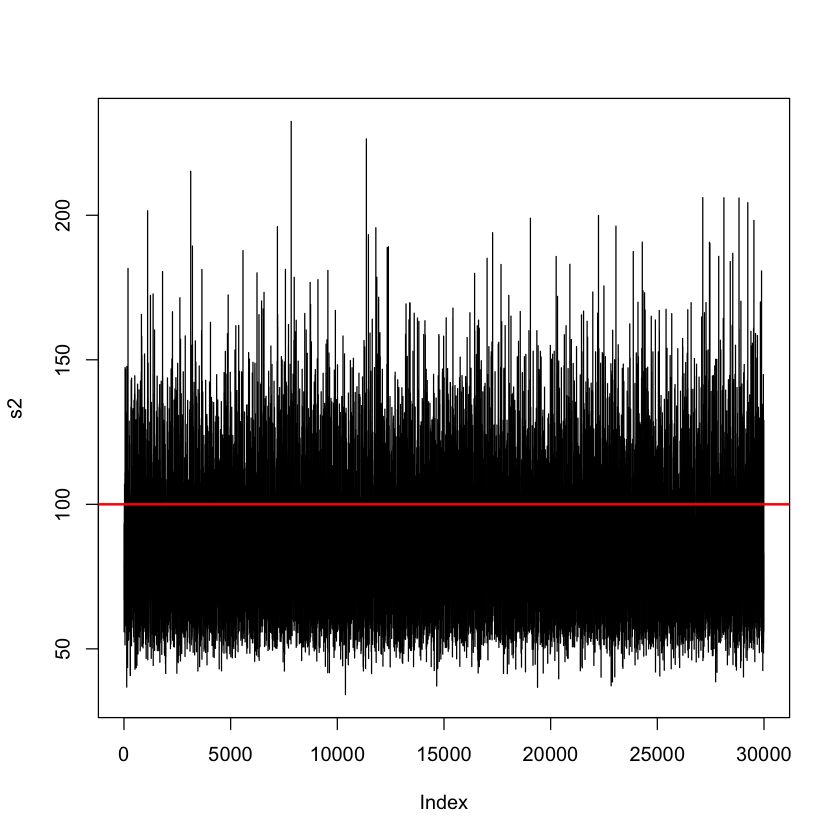

In [24]:
plot(theta[,3],type="l",ylab="s2")
 abline(sig2_true,0,col=2,lwd=2)

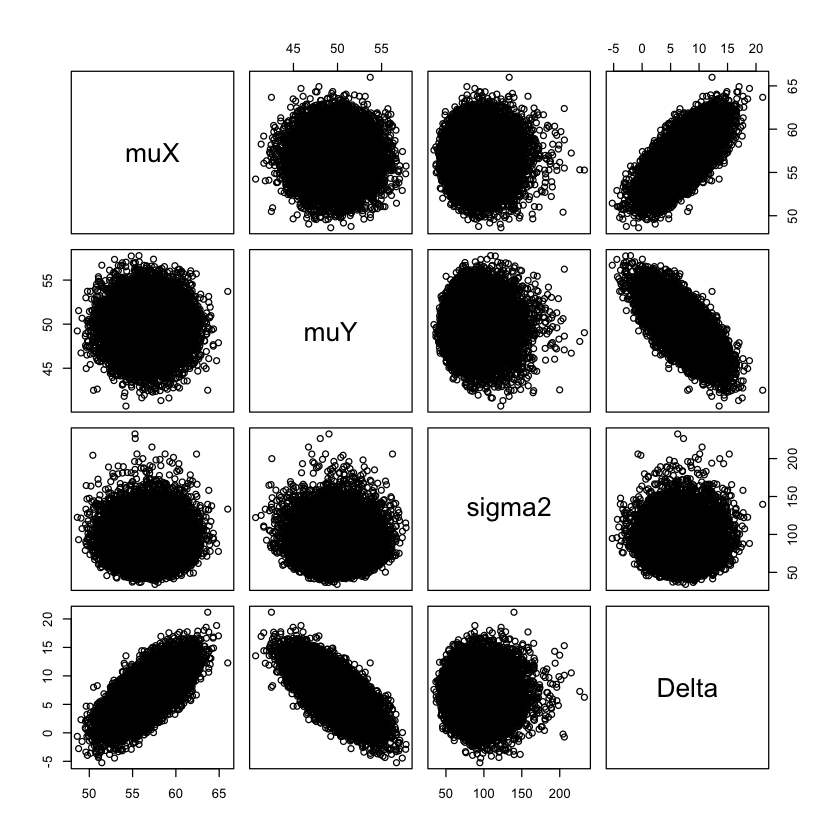

In [25]:
pairs(theta)

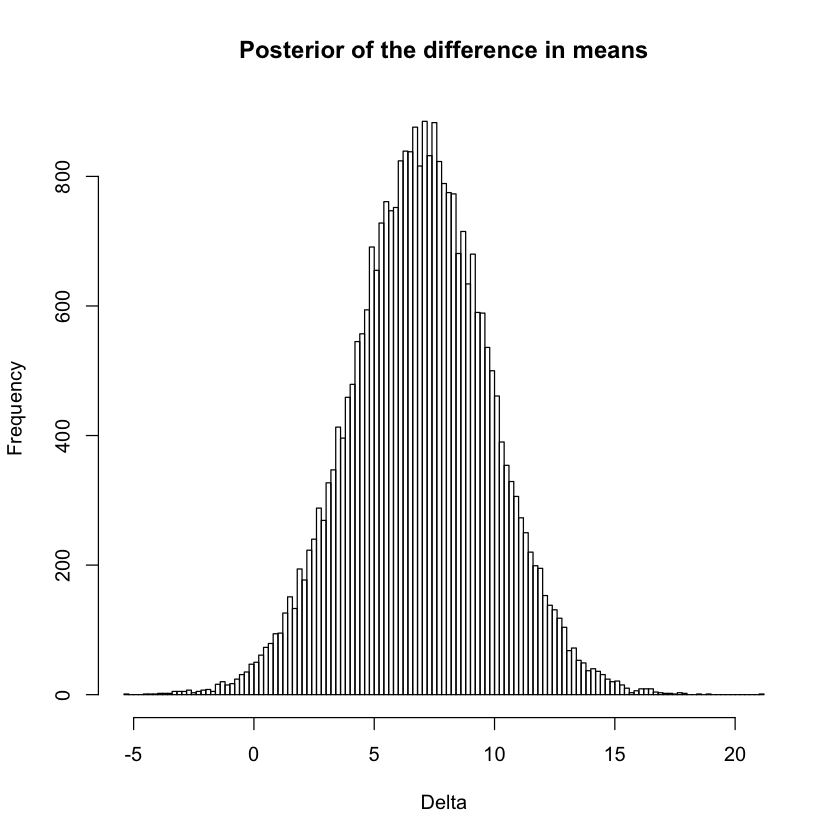

In [26]:
Delta = theta[,4]
hist(Delta,main="Posterior of the difference in means",breaks=100)


In [27]:
quantile(Delta,c(0.025,0.975)) # Posterior 95% credible set

2.5%     97.5% 
 1.263061 12.612540

In [28]:
mean(Delta>0) # Posterior probibility that muX>muY

[1] 0.9911667

**Code demonstrating that the distribution of the log-odds transformation of $p \sim U(0,1)$ is given by the transformation of RVs formula.**

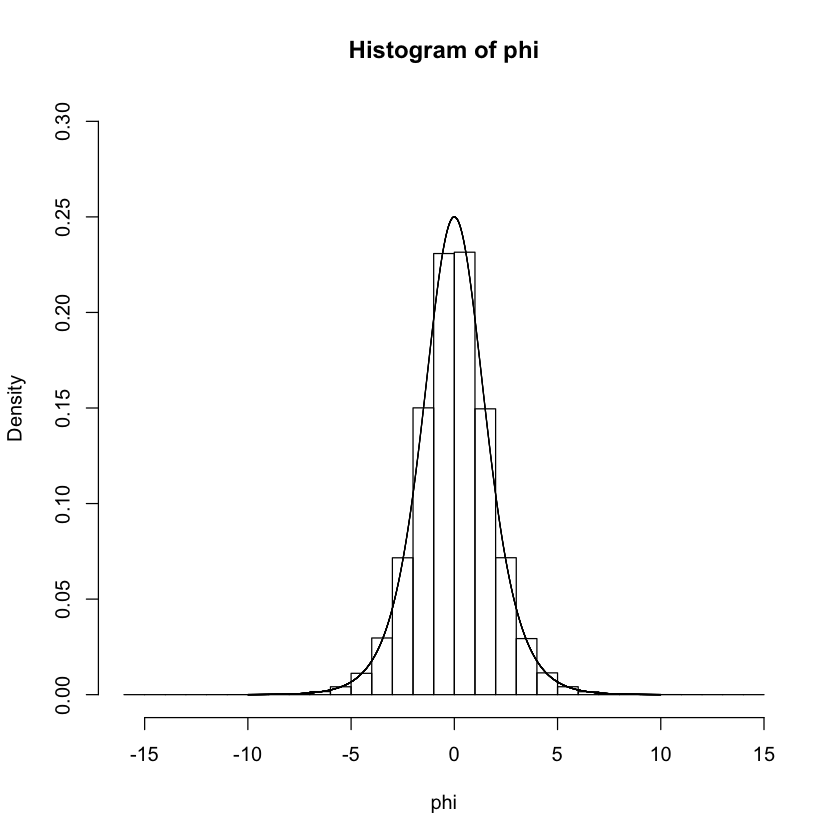

In [29]:
p = runif(1e6, 0, 1)
phi = log(p/(1-p))
f = function(p,alpha,beta){
    phiinv = 1/(1+exp(-p))
    ddp = exp(p)/(1+exp(p))^2
    val = dbeta(phiinv,1,1)*ddp
    return(val)
}

#integrate(f, -Inf, Inf,alpha = 1, beta = 1)
x = seq(-10,10,length.out = 1e6)
df = data.frame(x = x, f = f(x), phi = phi)
hist(phi, freq = FALSE, ylim = c(0,0.3), breaks = 30)
lines(x, f(x))


## Problem #5 Metropolis Sampling

Suppose that the parameters of interest are $\boldsymbol\theta = (\theta_1, \theta_2,...,\theta_p)^T$.

1. Draw an initial value $\boldsymbol\theta^{(0)}$ from a starting distribution, $\pi_0(\boldsymbol\theta)$


2. Sample a proposal, $\boldsymbol\theta^*$, from a symmetric proposal distribution at time $t$, $J_t(\boldsymbol\theta^* \, | \, \boldsymbol\theta^{(t-1)})$ based on the value at time $t-1$. For example, $$\boldsymbol\theta^* \sim \mbox{N}(\boldsymbol\theta^{(t-1)},s_j^2).$$


3. The proposal $\boldsymbol\theta^*$ is accepted (i.e., $\boldsymbol\theta^{(t)} = \boldsymbol\theta^*$) with probability $$R = \min\left\{1,\frac{\pi(\boldsymbol\theta^*|\mathbf{x})}{\pi(\boldsymbol\theta^{(t-1)}|\mathbf{x})}\right\}$$


If the candidate is not accepted then $\boldsymbol\theta^{(t)} = \boldsymbol\theta^{(t-1)}$.

User decisions:

- starting values, $\boldsymbol\theta^{(0)}$.


- proposal distribution, $J_t$. This includes additional parameters involved in $J_t$, e.g., the variance of a normal.


- Number of iterations, $m$.


- Burn-in period.


- 

Let's perform the MH algorithm on the cancer mortality data from problem #3 (the beta-binomial example). Note that we already did a lot of upfront work there

In [30]:
proposal=list(mu=array(c(-7,6)),var=diag(c(10,10)))
start=array(c(0,0)); 
T = 50000
mh_fit = indepmetrop(betabinexch, proposal, start,T,cancermortality)


In [31]:
mh_fit$accept
post.means=apply(mh_fit$par,2,mean); post.means
post.sds=apply(mh_fit$par,2,sd); post.sds
#means found from rejection sampling -6.81498015589262 7.9309802755355

0.04702


[1] -6.810189  7.948859

[1] 0.2994801 1.4785526

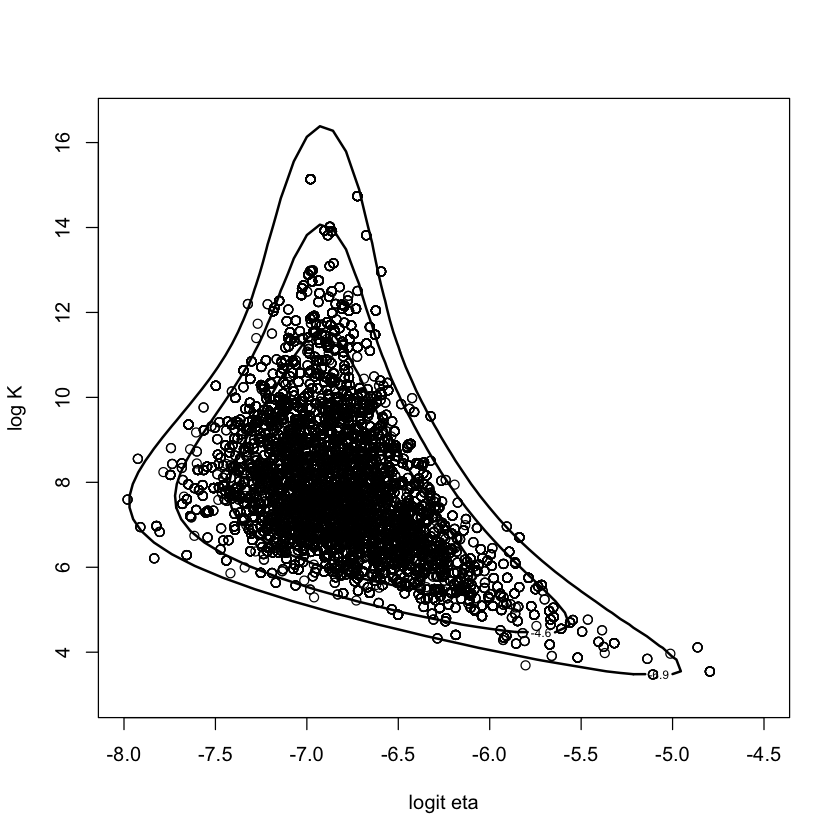

In [32]:
mycontour(betabinexch,c(-8,-4.5,3,16.5),cancermortality,xlab="logit eta",ylab="log K")
points(mh_fit$par[,1],mh_fit$par[,2])

The [lattice](https://cran.r-project.org/web/packages/lattice/index.html) package has some nice data visualization functions, e.g., `xyplot()`.

The [coda](https://cran.r-project.org/web/packages/coda/coda.pdf) package has some nice plots for summarizing and plotting the output from Markov Chain Monte Carlo (MCMC) simulations, as well as diagnostic tests of convergence to the equilibrium distribution of the Markov chain.

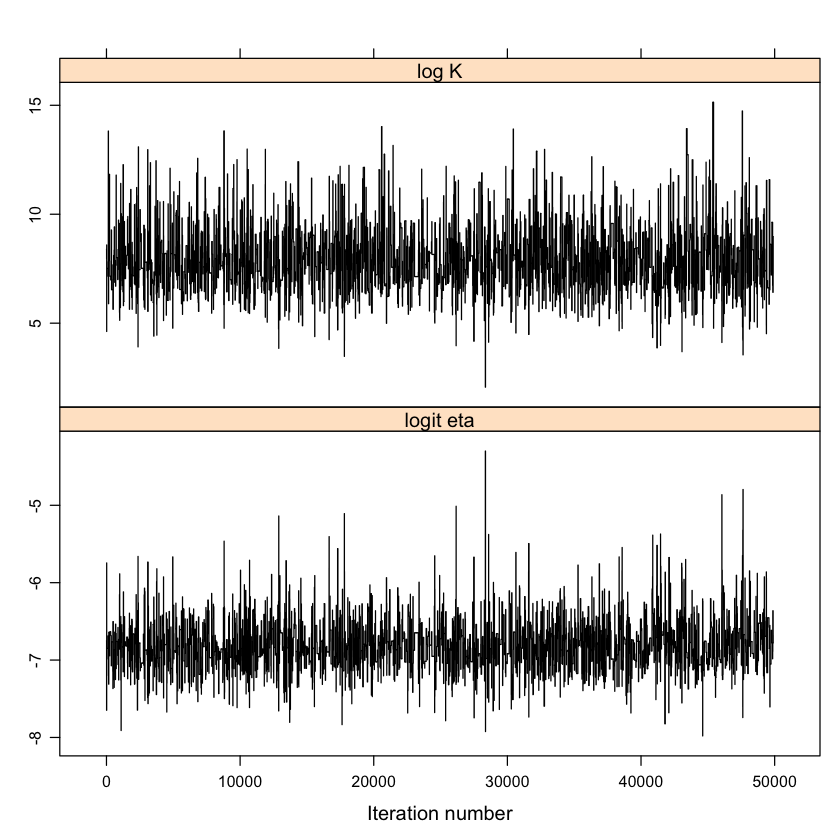

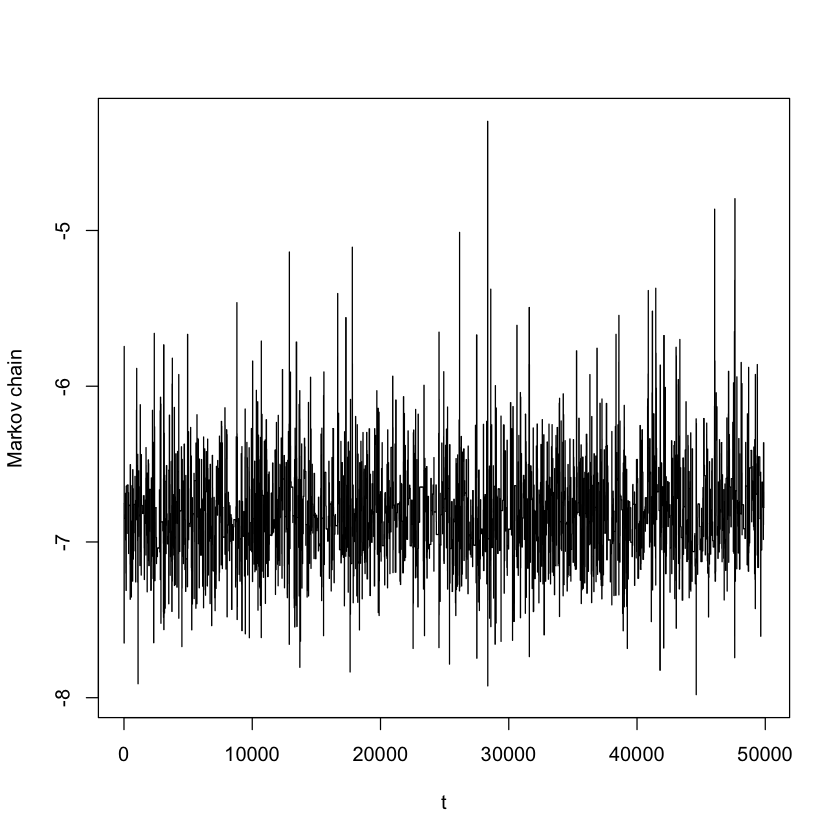

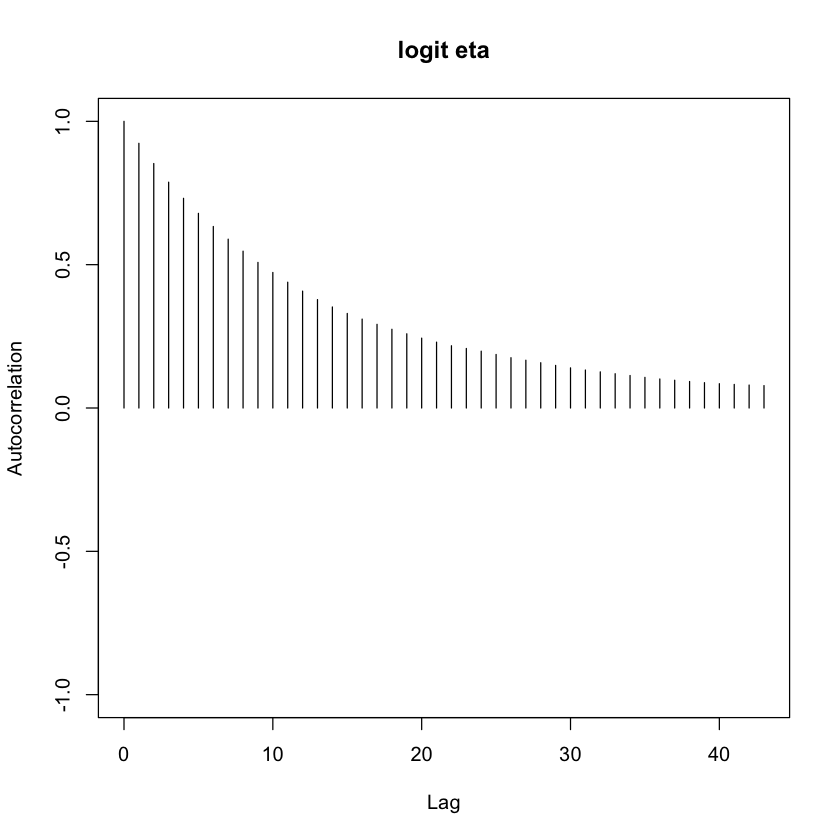

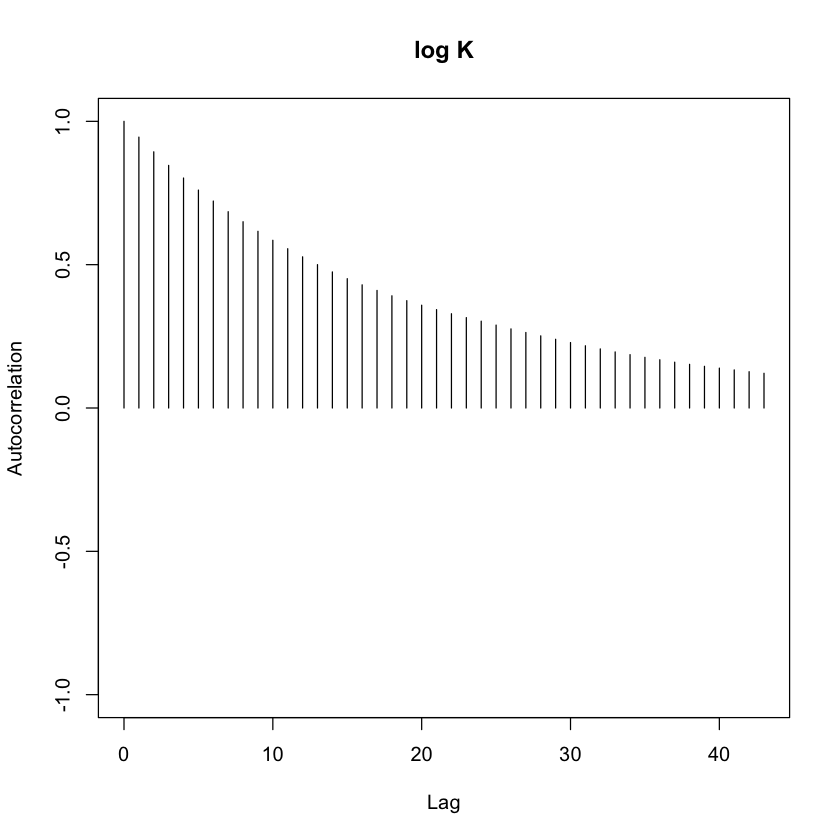

In [33]:
library(coda)
library(lattice)
burnin = 100
dimnames(mh_fit$par)[[2]]=c("logit eta","log K")
xyplot(mcmc(mh_fit$par[-c(1:burnin),]),col="black") #in lattice
plot(mh_fit$par[-c(1:burnin),1], type = "l", xlab = "t", ylab = "Markov chain")

#par(mfrow=c(2,1))
autocorr.plot(mcmc(mh_fit$par[-c(1:burnin),]),auto.layout=FALSE) #in coda


Now let's write our own Metropolis sampler! 

Some user choices:

- Let's suppose that we're completely ignorant about where to start, and choose to start at $\boldsymbol\theta = (0,0)^T$.


- Let the proposal distribution be bivariate normal, with $\sigma_c = 1$. 


- We'll do $T = 10,000$ iterations, with a burin period of $500$


Here's the MH algorithm on the log scale!

In [34]:
mhs = function(theta0,proposal_sd){
    samples = matrix(NA,T,2)
    theta = theta0
    for (t in 1:T){  
        proposal = rmvnorm(1,theta,diag(proposal_sd)); #sample a proposal
        logR = betabinexch(proposal, cancermortality) - 
            betabinexch(theta,cancermortality); #compute the log of the ratio
        if(log(runif(1))<logR){
            theta = proposal #accept/reject the proposal
            }
            samples[t,] = theta #store the accept/reject in the chain
            }
    return(samples)
}


Let's construct three Metropolis chains and plot them:

In [35]:
set.seed(89119)
#initial values
library(mvtnorm)
T = 10000
theta = c(0,0)
theta2 = c(10,10)
theta3 = c(-100,-100)
proposal_sd = c(1,1)

#three chains
chain1 = mhs(theta,proposal_sd)
chain2 = mhs(theta2,proposal_sd)
chain3 = mhs(theta3,proposal_sd)


Attaching package: ‘mvtnorm’

The following objects are masked from ‘package:LaplacesDemon’:

    dmvt, rmvt



logit eta       log K 
 0.01017426 -0.10909849

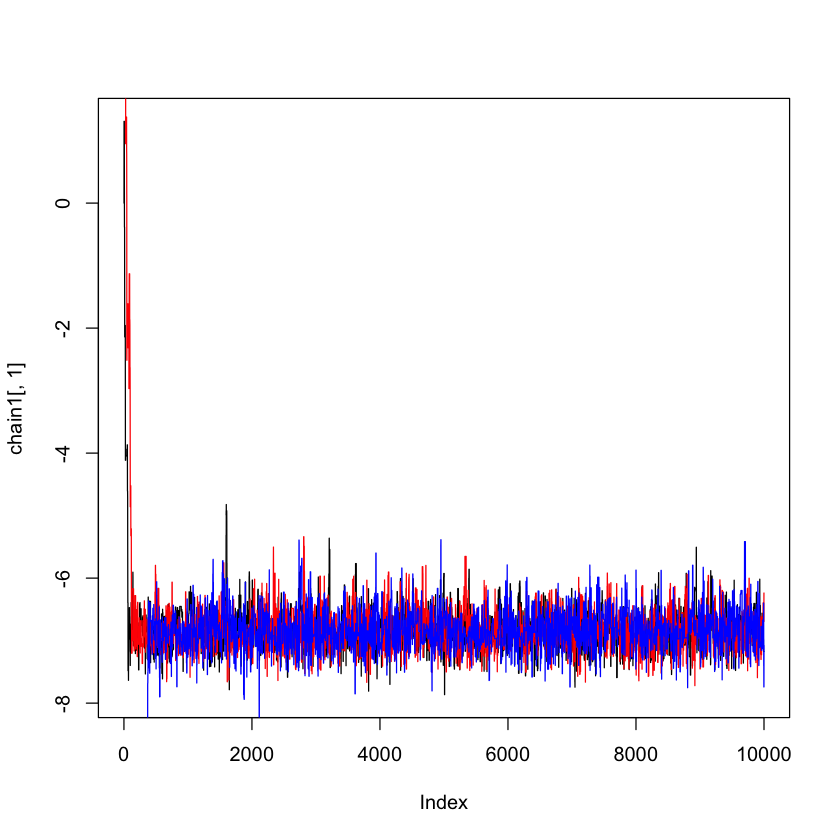

In [36]:
burnin = 500
dimnames(chain1)[[2]]=c("logit eta","log K")
#xyplot(mcmc(chain1[-c(1:burnin),]),col="black") #in lattice
plot(chain1[,1], type = "l")
lines(chain2[,1], type = "l", col = "red")
lines(chain3[,1], type = "l", col = "blue")

colMeans(chain1) - post.means

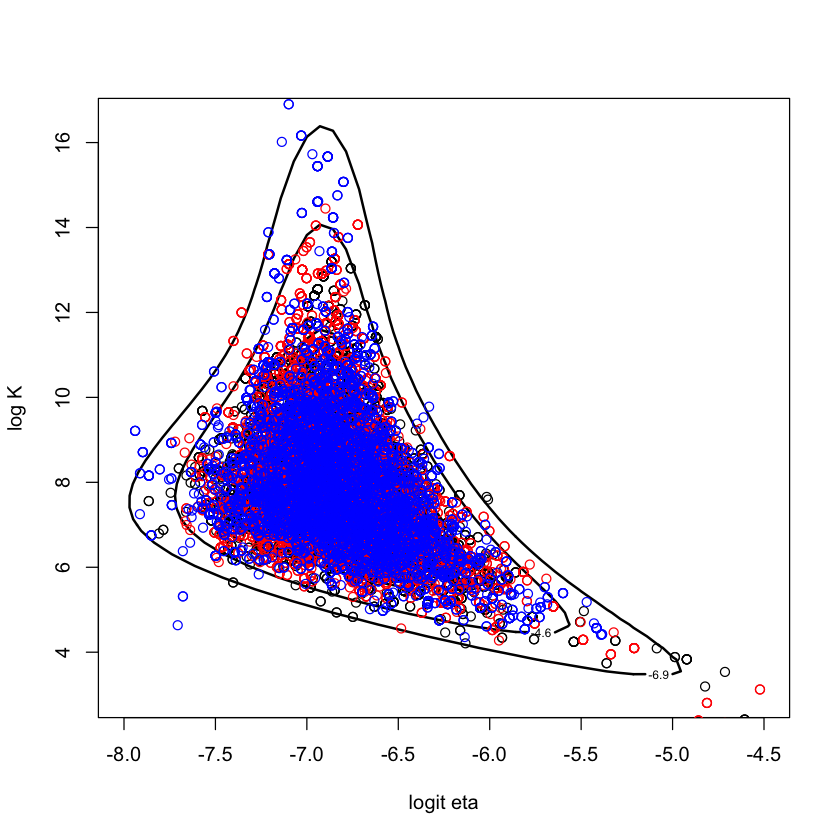

In [37]:
mycontour(betabinexch,c(-8,-4.5,3,16.5),cancermortality,xlab="logit eta",ylab="log K")
points(chain1[,1],chain1[,2])
points(chain2[,1],chain2[,2], col = "red")
points(chain3[,1],chain3[,2], col = "blue")

## Problem #6

Let $X \sim Poisson(\exp(\mu_1 + \mu_2))$ and $\mu_1,\mu_2 \sim N(0,1000)$. 


**Write a function that returns the log of the posterior distribution for this model.**

In [38]:
logpost = function(mu,data){
    #post = dpois(data, exp(mu[1] + mu[2]))*dnorm(mu[1],0,sqrt(1000))*dnorm(mu[2],0,sqrt(1000))
    logpost = dpois(data, exp(mu[1] + mu[2]),log = TRUE) + dnorm(mu[1],0,sqrt(1000),log = TRUE) + dnorm(mu[2],0,sqrt(1000),log = TRUE)
    return(logpost)
}

**Write a Metropolis sampler for the posterior distribution of $\mu_1,\mu_2 \, | \, y$.**

In [39]:
library(mvtnorm)
    T = 50000

mhs2 = function(mu0){   
    proposal_sd = c(1,1)
    samples = matrix(NA,T,2)
    mu = mu0
    for (t in 1:T){  
        proposal = rmvnorm(1,mu,diag(proposal_sd)); #sample a proposal
        logR = logpost(proposal, data) - 
            logpost(mu,data); #compute the log of the ratio
        if(log(runif(1))<logR){
            mu = proposal #accept/reject the proposal
            }
            samples[t,] = mu #store the accept/reject in the chain
        }
    return(samples)
}


data = 1
mu = c(1,1)
chain1 = matrix(NA,T,2); 
chain1 = mhs2(c(-10,-10))
chain2 = mhs2(mu)

**Produce some diagnostic summaries and comment on the results. What is odd about this model?**

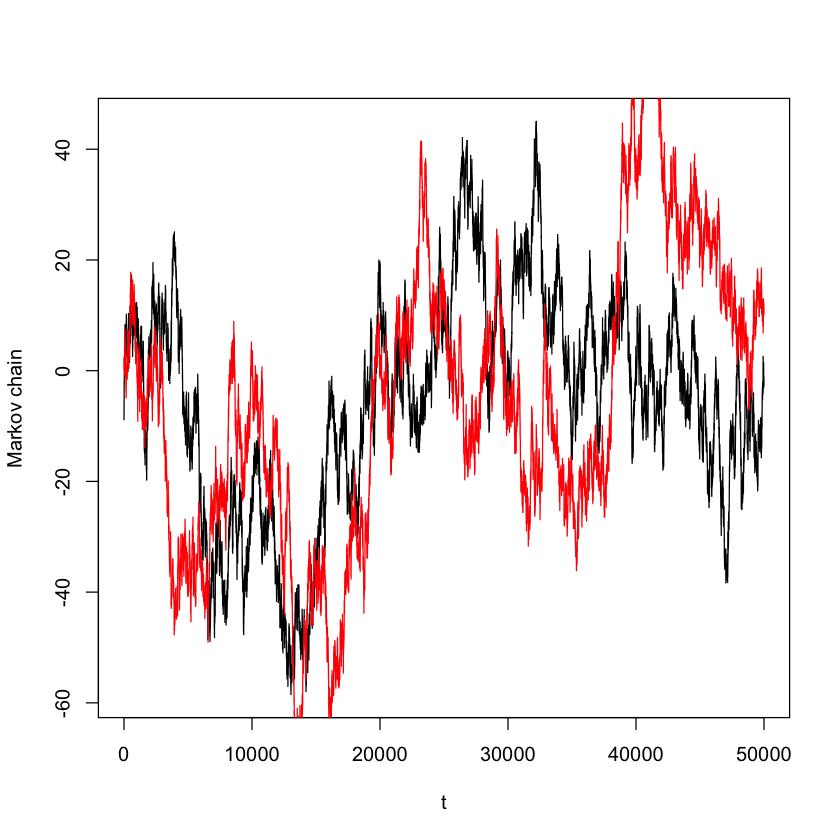

In [40]:
plot(chain1[,1], type = "l", xlab = "t", ylab = "Markov chain")
lines(chain2[,1], type = "l", col = "red")

## Problem #7

Let $Y_i$ be the number of concussions (aggregated over all teams and games) in season $i$ $(1=2012,…,4=2015)$. We model these counts as $Y_i \sim Poisson(Nλ_i)$ where 
$\lambda_i = exp(\beta_0 + \beta_1 i)$

$N$ is the number of games played per year and $\lambda_i$ is the rate in year $i$. To complete the Bayesian model, we specify uninformative priors $\beta_0, \beta_1 \sim N(0,\tau^2)$.

The log of the mean concussion rate is linear in time with $\beta_1$ determining the slope. The objective is to determine if the concussion rate is increasing, i.e., $\beta_1 > 0$.

In this analysis of these data with this algorithm, we tune the Metropolis candidate distributions during the burn-in period. The objective to tune the sampler so the acceptance rate is around $0.4$ for all parameters. We check the acceptance proportion in the last $100$ iterations and adjust the candidate SD if the acceptance probability is far from $0.4$.

(Problem from Bayesian Statistical Methods)

In [41]:
#load the data 

Y = c(171, 152, 123, 199)
t = 1:4
n = 4
N = 256

In [42]:
 # Create an empty matrix for the MCMC samples

S = 50000
samples = matrix(NA,S,2)
colnames(samples) = c("beta0","beta1")
fitted = matrix(0,S,4)

# Initial values
beta = c(0,0); beta #log(mean(Y/N))

 # priors: beta[j] ~ N(0,tau^2)

tau = 10

 # Initial candidate standard deviations

can_sd = c(1,1)

[1] 0 0

In [43]:
#log posterior as a function
log_post = function(Y,N,t,beta,tau){
    mn    = N*exp(beta[1]+beta[2]*t)
    like  = sum(dpois(Y,mn,log=TRUE))
    prior = sum(dnorm(beta,0,tau,log=TRUE))
    post  = like + prior
 return(post)}

In [44]:
 burn = 5000      # Length of burn-in period for tuning
 check = 100       # Iterations between checks of the acceptance rate     
 att = rep(0,2)  # Keep track of the number of MH attempts
 acc = rep(0,2)  # Keep track of the number of MH accepts

 for(s in 1:S){
   for(j in 1:2){ #component-wise updates
     att[j] = att[j] + 1  
     can = beta
     can[j] = rnorm(1,beta[j],can_sd[j])
     logR = log_post(Y,N,t,can,tau)-log_post(Y,N,t,beta,tau) 
     if(log(runif(1))<logR){
       beta = can
       acc[j] = acc[j] + 1  
     }
   }

   # TUNING!
   for(j in 1:length(att)){
      if(s<burn & att[j]==check){
        #print(paste0("Can sd of ", round(can_sd[j],3),
          #           " for beta[",j-1,"] gave acc rate ",acc[j]/att[j])) 
        if(acc[j]/att[j]<0.2){can_sd[j] = can_sd[j]*0.8}
        if(acc[j]/att[j]>0.6){can_sd[j] = can_sd[j]*1.2}
        acc[j] = att[j] = 0  
      }
   }

   samples[s,] = beta
   fitted[s,] = N*exp(beta[1]+beta[2]*t)
 }

Compute the acceptance rates and plot the samples

In [45]:
# Acceptance rates
 colMeans(samples[burn:S,]!=samples[burn:S - 1,])

beta0     beta1 
0.2782160 0.3627919

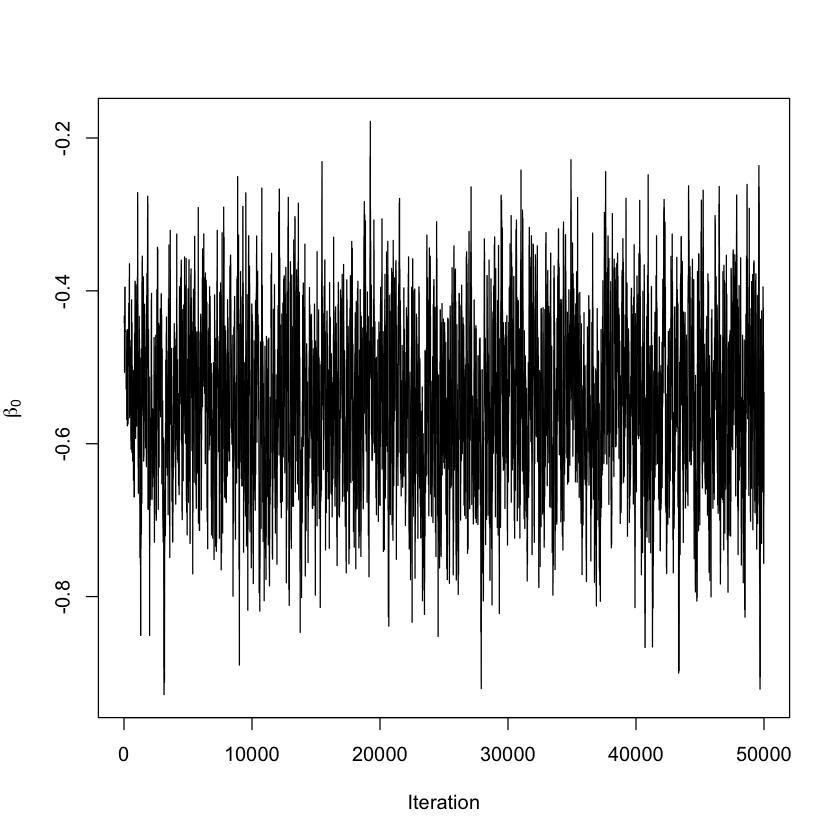

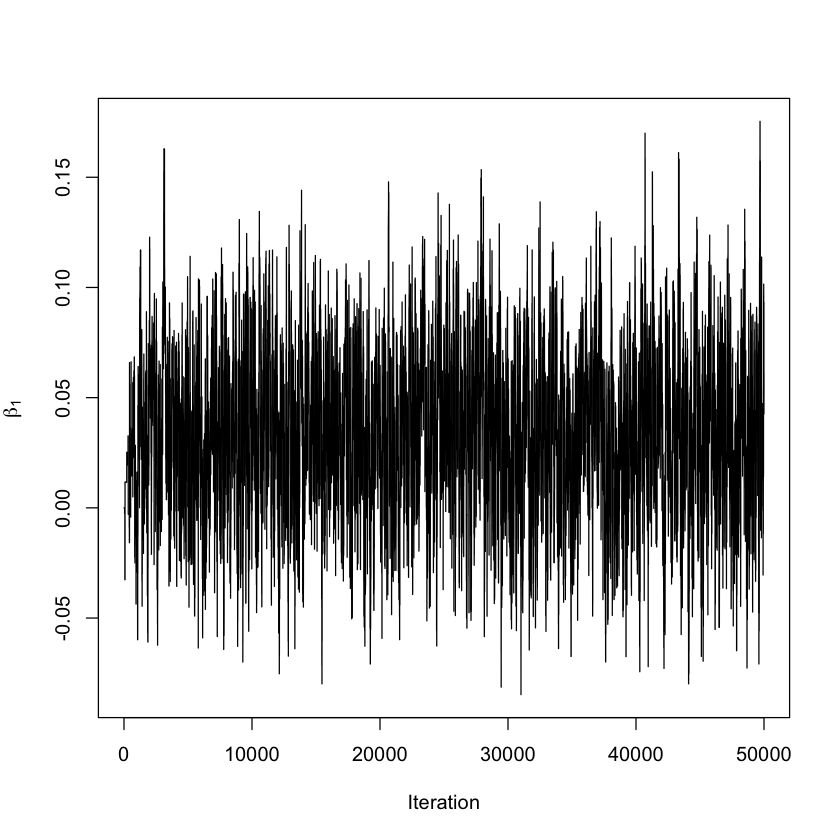

In [46]:
plot(samples[,1],type="l",xlab="Iteration",ylab=expression(beta[0]))
plot(samples[,2],type="l",xlab="Iteration",ylab=expression(beta[1]))

In [47]:
#log posterior as a function
log_post = function(beta,Y,N,t,tau){
    mn    = N*exp(beta[1]+beta[2]*t)
    like  = sum(dpois(Y,mn,log=TRUE))
    prior = sum(dnorm(beta,0,tau,log=TRUE))
    post  = like + prior
 return(post)}

In [48]:
library(MHadaptive)
# Initial values
beta = c(0,0)

 # priors: beta[j] ~ N(0,tau^2)

tau = 10

 # Initial candidate standard deviations

can_sd = c(1,1)

adapt = Metro_Hastings(log_post, beta, prop_sigma = NULL,
        par_names = NULL, iterations = S, burn_in = 100,
        adapt_par = c(100, 20, 0.5, 0.75), quiet = FALSE, Y = Y, N = N,t = t,tau = tau)

Loading required package: MASS


[1] "updating: 10%"
[1] "updating: 20%"
[1] "updating: 30%"
[1] "updating: 40%"
[1] "updating: 50%"
[1] "updating: 60%"
[1] "updating: 70%"
[1] "updating: 80%"
[1] "updating: 90%"
[1] "updating: 100%"


[1] 0.5526453

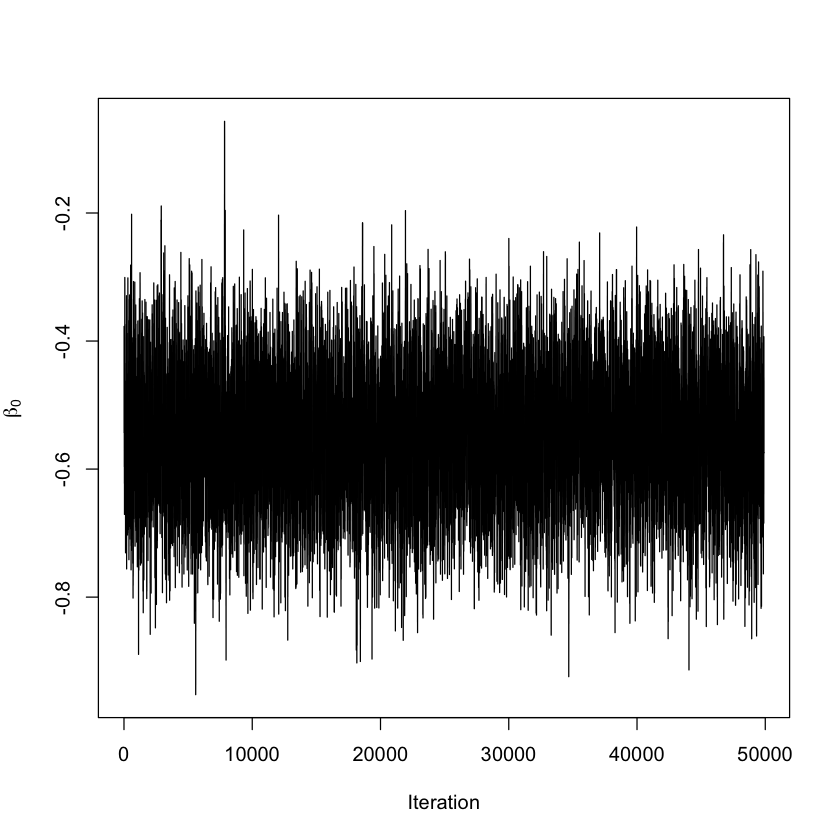

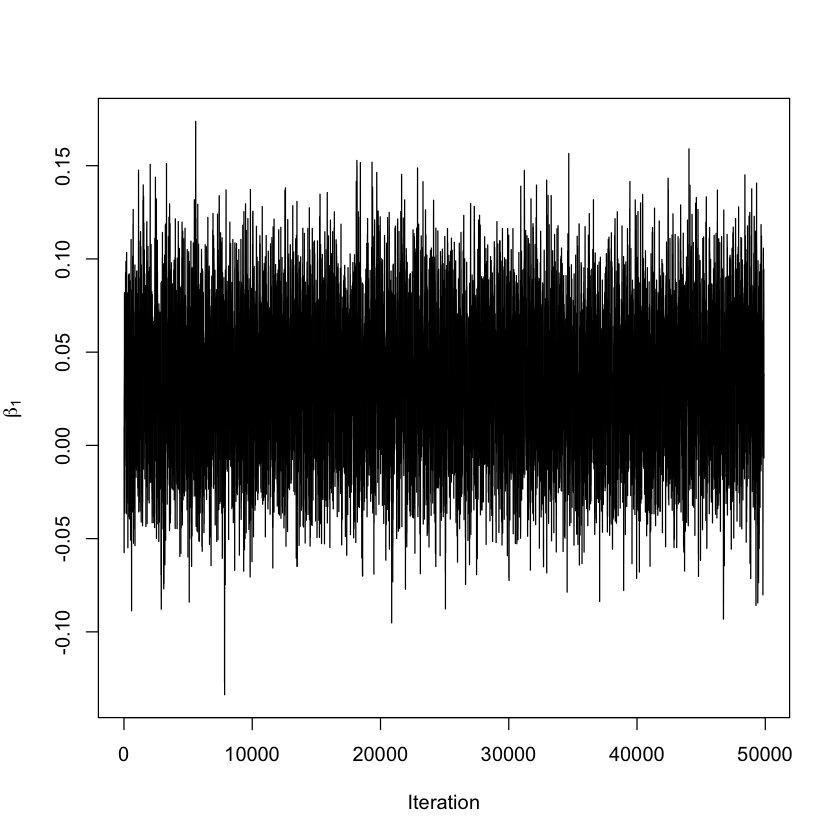

In [79]:
adapt$accept
plot(adapt$trace[,1],type="l",xlab="Iteration",ylab=expression(beta[0]))
plot(adapt$trace[,2],type="l",xlab="Iteration",ylab=expression(beta[1]))

[1] -0.54963329  0.03389098

beta0       beta1 
-0.54689352  0.03318764

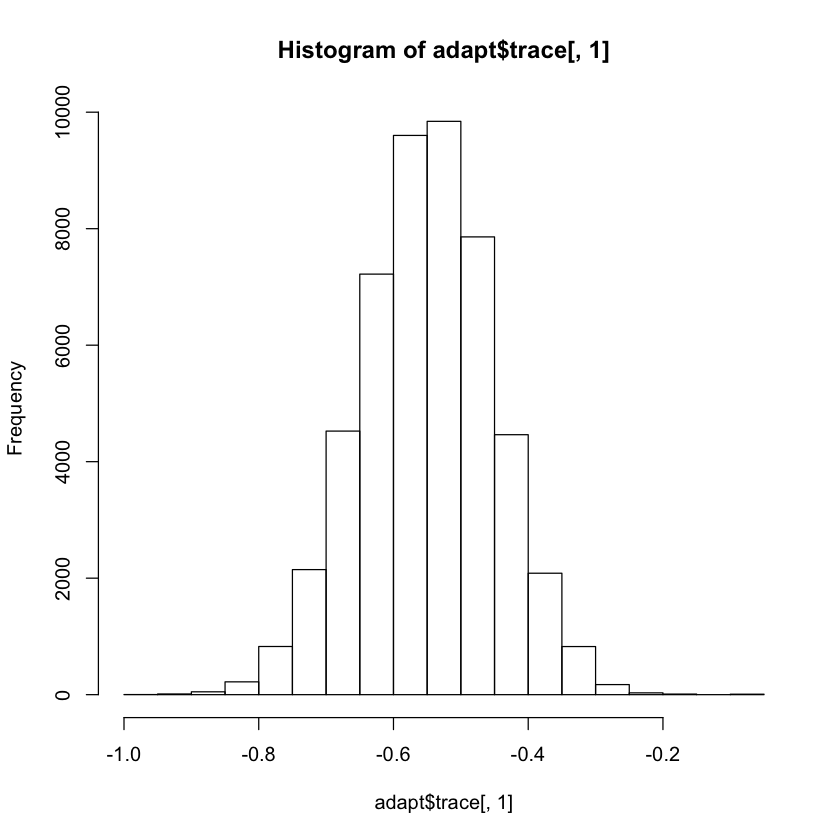

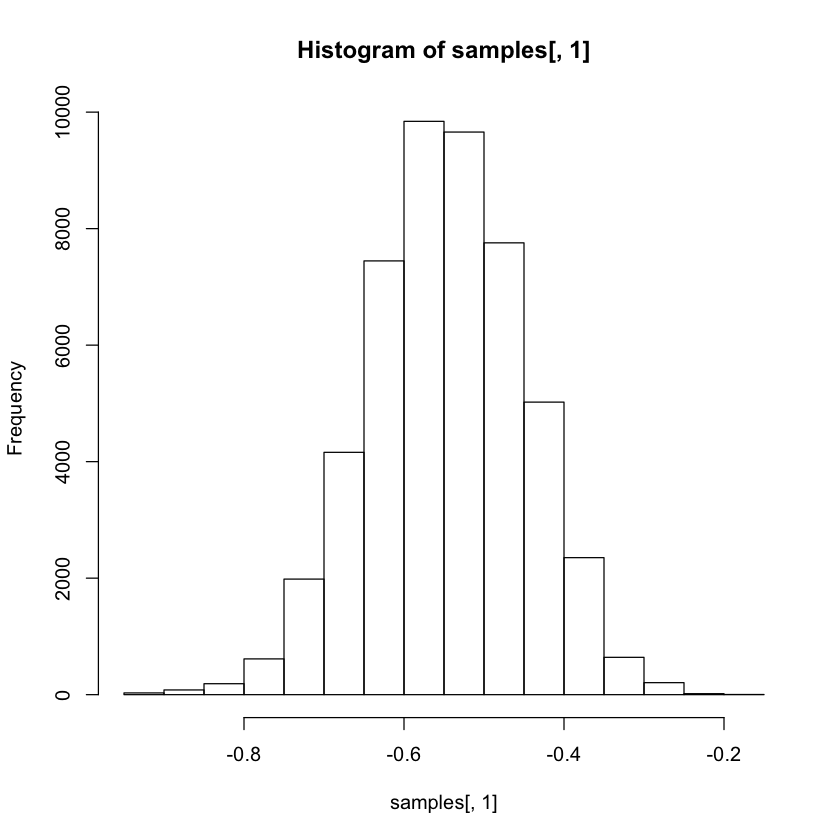

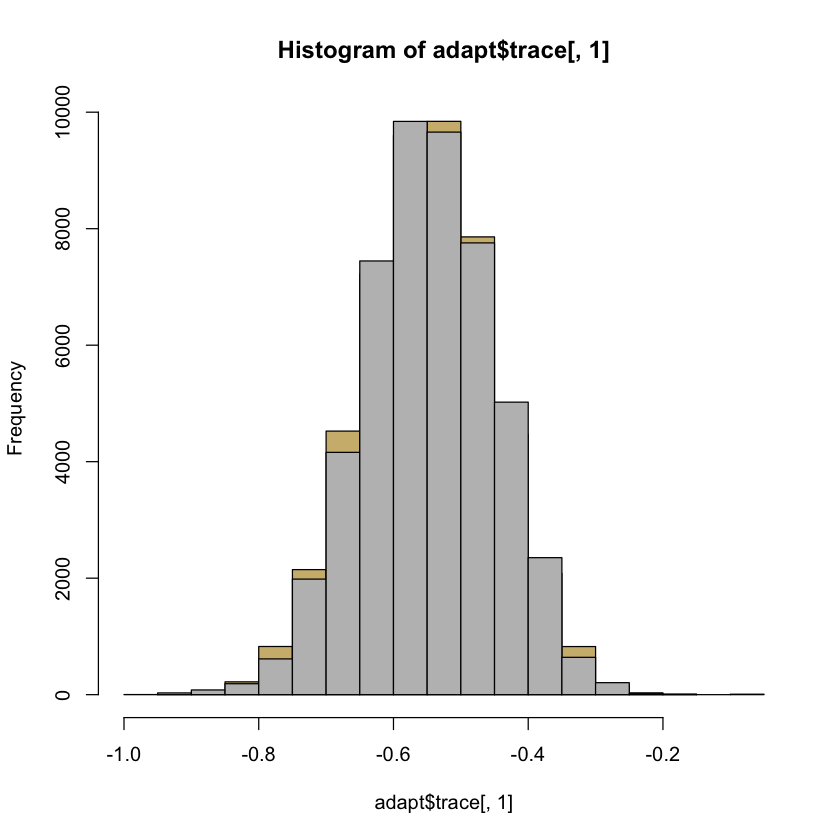

In [50]:
colMeans(adapt$trace)
colMeans(samples[burn:S,])

p1 = hist(adapt$trace[,1])
p2 = hist(samples[,1])
plot( p1, col="#CFB87C", freq = TRUE) 
plot( p2, col="grey", freq = TRUE, add=T)

In [76]:
library(fmcmc) #https://uscbiostats.github.io/fmcmc/
#library(adaptMCMC)
# Running the MCMC (we set the seed first)
set.seed(1215)
ans = MCMC(log_post, initial = c(0, 0), nsteps  = 50000, nchains = 2, kernel = kernel_normal(scale = 0.05),Y = Y, N = N,t = t,tau = tau)

Warning message:
“While using multiple chains, a single initial point has been passed via `initial`: c(0, 0). The values will be recycled. Ideally you would want to start each chain from different locations.”

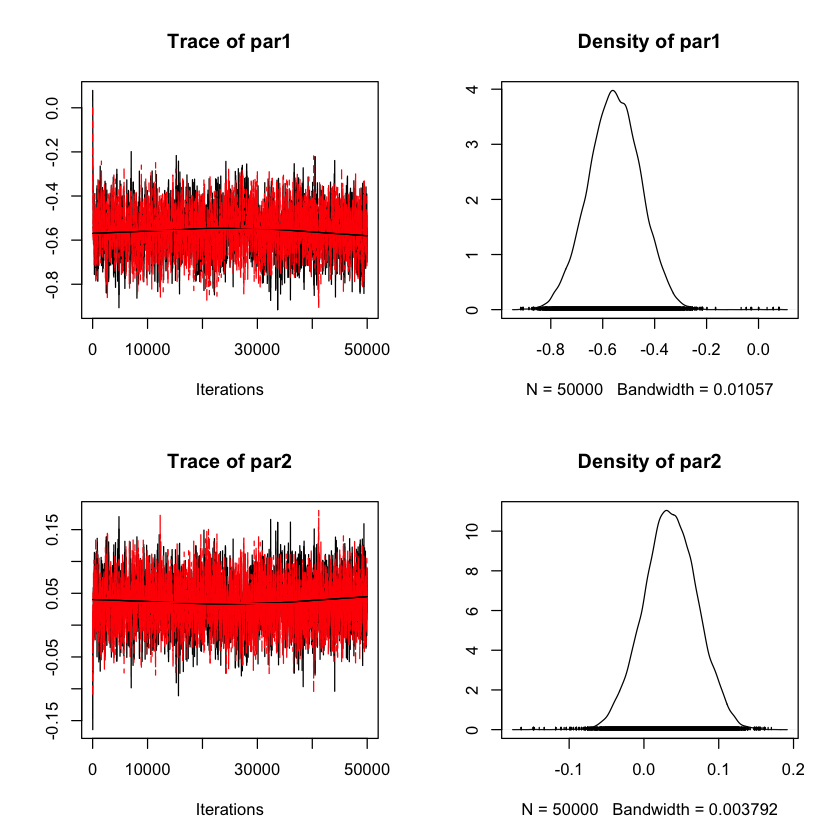

In [77]:
library(coda)
plot(ans)

In [68]:
summary(ans)


Iterations = 1:50000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 50000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
par1 -0.55597 0.10170 0.0004548       0.003749
par2  0.03616 0.03647 0.0001631       0.001282

2. Quantiles for each variable:

         2.5%      25%      50%      75%   97.5%
par1 -0.75400 -0.62438 -0.55670 -0.48810 -0.3547
par2 -0.03792  0.01242  0.03651  0.06077  0.1060
